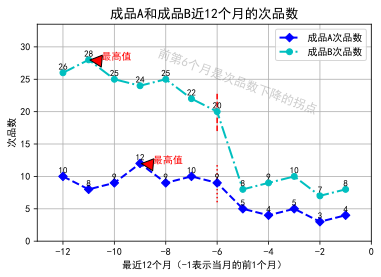

In [2]:
#提高图片显示的分辨率，如果无此语句，图片显示不清晰
%config InlineBackend.figure_format = 'svg' 

#导入matplotlib的子库pyplot并命名为plt
import matplotlib.pyplot as plt 
import numpy as np

#使图形中的中文正常编码显示
plt.rcParams['font.sans-serif'] = ['SimHei']
#使坐标轴刻度正常显示负号
plt.rcParams['axes.unicode_minus'] = False

#模拟生产数据
period = range(-12,0)
compA_defectNum = [10, 8, 9, 12, 9, 10, 9, 5, 4, 5, 3, 4]
compA_dayProduce = 100
compB_defectNum = [26, 28, 25, 24, 25, 22, 20, 8, 9, 10, 7, 8]
compB_dayProduce = 800

#折线绘图
plt.title('成品A和成品B近12个月的次品数', fontsize=13.5)
plt.xlabel('最近12个月（-1表示当月的前1个月）')
plt.ylabel('次品数')
plt.grid(True)
plt.plot(period, compA_defectNum, label='成品A次品数', c='b', ls='--', marker='D', lw=2)
plt.plot(period, compB_defectNum, label='成品B次品数', c='c', ls='-.', marker='o', lw=2)
plt.legend() #显示题注

#标注次品数及最大值
for comp in [compA_defectNum, compB_defectNum]:
    for a, b in zip(period, comp):
        plt.text(a, b+0.3, '%d'%b, ha='center', va='bottom', fontsize=9) 
    #重点标注次品数最大值
    plt.annotate('最大值', (period[comp.index(max(comp))],max(comp)), (period[comp.index(max(comp))] + 0.5, max(comp)), xycoords='data',
             arrowprops=dict(facecolor='r', shrink=0.1), c='r',fontsize=10)

#拐点线
plt.vlines(period[6], compA_defectNum[6]-3, compA_defectNum[6]+3, linestyles ="dotted", colors ="r")
plt.vlines(period[6], compB_defectNum[6]-3, compB_defectNum[6]+3, linestyles ="dashed", colors ="r")

#显示水印
c = 0.4 * (min(period) + max(period))
d = min(compA_defectNum) + 1.85 * (max(compA_defectNum)-min(compA_defectNum))
plt.text(c, d, '前第6个月是次品数下降的拐点', ha='center', fontsize=12.5, rotation=-20, c='gray', alpha=0.4)

#设置坐标轴刻度
plt.xlim(-13, 0)
plt.ylim(0, 33.5)

#保存图片 #注：savefig要在show前面，否则保存的是空白的图片
plt.savefig("001_data_PlotLineChart.png")  
plt.show()